# Data Science for Social Justice Workshop: Geospatial Analysis

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Recognize different forms of geospatial data and coordinate reference system (CRS).
* Use `GeoPandas` and `matplotlib` libraries to map and analyze spatial data.
* Apply Python libraries for interactive visualization.
* Choose social justice-oriented datasets to create your own maps.

</div>

### Sections
1. [Introduction to Geospatial Data](#section1)
2. [Introduction to GeoPandas](#section2)
3. [CRS and Map Projection](#section3)
4. [Mapping and Spatial Analysis](#section4)
5. [Interactive Visualization](#section5)
3. [API, Vector and Raster Data Sources](#section6)
4. [Create Your Own Map](#section7)

Throughout this workshop series, we will use the following icons:

🔔 **Question**: A quick question to help you understand what's going on. <br>
🥊 **Challenge**: Interactive exercise. We'll go through these in the workshop!<br>
⚠️ **Warning**: Heads-up about tricky stuff or common mistakes.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
📝 **Poll**: A zoom poll to help you learn.<br>
🎬 **Demo**: Showing off something more advanced so you know what you can use R for in the future.

<a id='section1'></a>

# 1. Introduction to Geospatial Data

Geospatial data is data that have a location on the surface of the earth, including location information (usually coordinates on the earth), attribute information (the characteristics of the object, event, or phenomena concerned). It is essential for a variety of discplines such as urban planning and environmental science. 

We will begin today's workshop with an overview of the geospatial data. We will introduce the following concepts that you will frequently encounter when working with geospatial data:

- Geospatial data
- Coordinate Reference Systems (CRS)
- Geographic Coordinate Systems (GCS) and Projected Coordinate Systems (PCS)
- Types of spatial data (vector vs. raster)

## Geographic Data vs. Geospatial Data

<img src="../../images/UC%20Berkeley.jpg" width="500"/>
</div>

A single unit of **geographic data** includes:
- **Location (where)**: UC Berkeley
- **Attributes**: data that describe the location

Also great to have metadata:
- **Source**
- **Datum, Projection**

<div>
<img src="../../images/Berkeley%20Map.jpg" width="500"/>
</div>

**Geospatial data** encodes location geometrically with coordinates [latitude, longitude]: [37.87131, -122.26019].

## Coordinate Reference Systems (CRS)

A Coordinate Reference System, or CRS, is a system for associating coordinates with a **specific, unambiguous** location on the surface of the Earth. There are two types of coordinate reference systems: **Geographic CRS** and **Projected CRS**.

<div>
<img src="../../images/CRS.jpg" width="500"/>
</div>

Geographic CRS use angular units (degrees) while projected CRS use Cartesian units (feet or meters) more commonly used for local or regional mapping and analysis. 

### GCS is widely used and expressed as latitude and longitude.
- CRSs are referenced in software by numeric codes, often callsed **EPSG codes**.
- WGS84 (EPSG: 4325): Based on satellites, used by cell phones, GPS; best overall fit for most places on earth.
- NAD83 (EPSG: 4269): Based on satellite and survey data; best fit for USA; used by many federal data products, like Census data

### PCS transforms geographic coordinates (lat/lon) to 2D coordinates (X/Y)

- All maps projections introduce **distortion** in area, shape, distance or direction. 
- Specific map projections minimize distortion in one or more properties. 
- You need to know the coordinate reference system of your input data.
- You need to select the CRS that is most suitable for your data and application.
- The Mercator projection, for example, is used where angular relationships are important (shape, direction), but areas are distorted, especially as you move away from the equator.

## Types of Spatial Data

There are two fundemental spatial data models:
- Vector
- Raster

<div>
<img src="../../images/raster_vector.png" width="350"/>
</div>

<a id='section2'></a>

# 2. Introduction to GeoPandas

In this lesson, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.

## What is GeoPandas?

[`GeoPandas`](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past. `GeoPandas` is now the go-to package for working with vector geospatial data in Python. 

If you work with raster data, check out the [`rasterio`](https://rasterio.readthedocs.io/en/latest/) package. We will introduce it briefly in the second half of the workshop.

`GeoPandas` gives you access to all of the functionality of [`pandas`](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data. So, if you're familiar with pandas, working with geospatial data is a natural next step.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install `GeoPandas` within this notebook:

In [1]:
# Install GeoPandas if you don't have it yet
%pip install geopandas==0.14.4 --upgrade

  Obtaining dependency information for geopandas==0.14.4 from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/3c/2c/7f1968ecc17350db3c87d0feb59852ea50e7d8688a63659879d92badf90a/fiona-1.10.1-cp310-cp310-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 5.2 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/82/65/ee312dc4cdd2499cc5984144e05c582604afd76ba01289d89d74b50ab654/pyproj-3.7.0-cp310-cp310-macosx_14_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/03/10/bd6edb66ed0a845f0809f7ce653596f6fd9c6be675b3653872f47bf49f82/shapely-2.0.6-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for clic

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline 

### Read in a Shapefile

As we discussed in the initial geospatial overview, a *shapefile* is one type of geospatial data that holds vector data. 

> To learn more about ESRI Shapefiles, this is a good place to start: [ESRI Shapefile Wiki Page](https://en.wikipedia.org/wiki/Shapefile) 

The tricky thing to remember about shapefiles is that they're actually a collection of 3 to 9+ files together. Here's a list of all the files that can make up a shapefile:
 
* `shp`: The main file that stores the feature geometry
* `shx`: The index file that stores the index of the feature geometry  
* `dbf`: The dBASE table that stores the attribute information of features 
* `prj`: The file that stores the coordinate system information. (should be required!)
* `xml`: Metadata: Stores information about the shapefile.
* `cpg`: Specifies the code page for identifying the character set to be used.

But it remains the most commonly used file format for vector spatial data, and it's really easy to visualize in one go!

Let's try it out with [California counties](https://gis.data.ca.gov/datasets/8713ced9b78a4abb97dc130a691a8695_0/about), and use GeoPandas for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we'll specify the `shp` file:

In [4]:
# Read in the shapefile
counties = gpd.read_file('../../data/cb_2023_us_county_500k/cb_2023_us_county_500k.shp')

<Axes: >

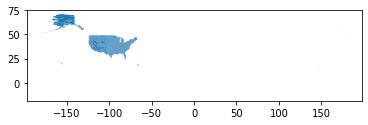

In [6]:
# Plot out counties
counties.plot()

## Exploring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a *GeoDataFrame* is and how it's different from a pandas *DataFrame*.

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. Let's emphasize this point, because it's important:

> A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column.

This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame!

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [7]:
# Find the number of rows and columns in counties
counties.shape

(3235, 13)

In [8]:
# Look at the first couple of rows in our geodataframe
counties.head()

STATEFP COUNTYFP  COUNTYNS         GEOIDFQ  GEOID     NAME        NAMELSAD  \
0      01      003  00161527  0500000US01003  01003  Baldwin  Baldwin County   
1      01      069  00161560  0500000US01069  01069  Houston  Houston County   
2      01      005  00161528  0500000US01005  01005  Barbour  Barbour County   
3      01      119  00161585  0500000US01119  01119   Sumter   Sumter County   
4      05      091  00069166  0500000US05091  05091   Miller   Miller County   

  STUSPS STATE_NAME LSAD       ALAND      AWATER  \
0     AL    Alabama   06  4117725048  1132887203   
1     AL    Alabama   06  1501742235     4795415   
2     AL    Alabama   06  2292160151    50523213   
3     AL    Alabama   06  2340898915    24634880   
4     AR   Arkansas   06  1616257232    36848741   

                                            geometry  
0  POLYGON ((-88.02858 30.22676, -88.02399 30.230...  
1  POLYGON ((-85.71209 31.19727, -85.70934 31.198...  
2  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
3  POLYGON ((-88.41492 32.36452, -88.41471 32.366...  
4  POLYGON ((-94.04343 33.55158, -94.04332 33.552...

In [7]:
# Look at all the variables included in our data
counties.columns

Index(['OBJECTID', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM', 'COUNTY_COD',
       'COUNTY_FIP', 'ISLAND', 'GlobalID', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [32]:
inequalities = pd.read_csv('../../data/county_health_inequality.csv',encoding='latin1')

In [33]:
inequalities

cty county_name  cty_pop2000     cz       cz_name  cz_pop2000  \
0      1001     Autauga        43671  11101    Montgomery    367927.0   
1      1003     Baldwin       140415  11001        Mobile    599405.0   
2      1005     Barbour        29038  10301       Eufaula     61458.0   
3      1007        Bibb        20826  10801    Tuscaloosa    261112.0   
4      1009      Blount        51024  10700    Birmingham   1038182.0   
...     ...         ...          ...    ...           ...         ...   
3133  56037  Sweetwater        37613  36404  Rock Springs     80730.0   
3134  56039       Teton        18251  36303       Jackson     24250.0   
3135  56041       Uinta        19742  36404  Rock Springs     80730.0   
3136  56043    Washakie         8289  34302       Worland     13171.0   
3137  56045      Weston         6644  34601      Gillette     46229.0   

     statename  state_id stateabbrv    csa  ... dropout_r  cs_educ_ba  \
0      Alabama         1         AL    NaN  ...  0.003900        18.0   
1      Alabama         1         AL  380.0  ...  0.002539        23.1   
2      Alabama         1         AL    NaN  ... -0.007111        10.9   
3      Alabama         1         AL  142.0  ... -0.006158         7.1   
4      Alabama         1         AL  142.0  ...  0.011457         9.6   
...        ...       ...        ...    ...  ...       ...         ...   
3133   Wyoming        56         WY    NaN  ...  0.036261        17.0   
3134   Wyoming        56         WY    NaN  ...       NaN        45.8   
3135   Wyoming        56         WY    NaN  ...       NaN        15.0   
3136   Wyoming        56         WY    NaN  ...       NaN        18.7   
3137   Wyoming        56         WY    NaN  ... -0.001208        14.5   

      tuition  gradrate_r  e_rank_b  cs_fam_wkidsinglemom  crime_total  \
0         NaN         NaN  41.87288              0.191595     0.009353   
1     2055.67   -0.247166  44.49239              0.186778     0.007371   
2         NaN         NaN  37.71876              0.337853     0.007749   
3         NaN         NaN  42.24516              0.197729     0.004514   
4         NaN         NaN  49.04332              0.121988     0.002019   
...       ...         ...       ...                   ...          ...   
3133  1128.00    0.158455  56.36696              0.169972     0.011671   
3134      NaN         NaN  52.44689              0.153690     0.003835   
3135      NaN         NaN  55.72552              0.169347     0.004660   
3136      NaN         NaN  50.83900              0.143126     0.013633   
3137      NaN         NaN  59.99648              0.148103     0.004214   

      subcty_exp_pc   taxrate  tax_st_diff_top20  
0         1059.6690  0.011183                0.0  
1         2209.9100  0.011756                0.0  
2         1570.2480  0.012059                0.0  
3         1338.4410  0.008007                0.0  
4          987.4388  0.007012                0.0  
...             ...       ...                ...  
3133      4166.1130  0.051011                0.0  
3134      5373.5230  0.043496                0.0  
3135      3627.8000  0.056147                0.0  
3136      2368.8600  0.020641                0.0  
3137      3820.9580  0.025310                0.0  

[3138 rows x 76 columns]

In [34]:
import pandas as pd
import geopandas as gpd

# Ensure GEOID and cty are the same type
counties['GEOID'] = counties['GEOID'].astype(str)  # Convert county GEOID to string
inequalities['cty'] = inequalities['cty'].astype(str)  # Convert inequality FIPS code to string

# Merge the county shapefile GeoDataFrame with inequality data
merged_gdf = counties.merge(inequalities, left_on='GEOID', right_on='cty', how='left')

# Check the resulting GeoDataFrame
merged_gdf.head()

STATEFP COUNTYFP  COUNTYNS         GEOIDFQ  GEOID     NAME        NAMELSAD  \
0      01      003  00161527  0500000US01003  01003  Baldwin  Baldwin County   
1      01      069  00161560  0500000US01069  01069  Houston  Houston County   
2      01      005  00161528  0500000US01005  01005  Barbour  Barbour County   
3      01      119  00161585  0500000US01119  01119   Sumter   Sumter County   
4      05      091  00069166  0500000US05091  05091   Miller   Miller County   

  STUSPS STATE_NAME LSAD  ...  dropout_r  cs_educ_ba tuition gradrate_r  \
0     AL    Alabama   06  ...        NaN         NaN     NaN        NaN   
1     AL    Alabama   06  ...        NaN         NaN     NaN        NaN   
2     AL    Alabama   06  ...        NaN         NaN     NaN        NaN   
3     AL    Alabama   06  ...        NaN         NaN     NaN        NaN   
4     AR   Arkansas   06  ...        NaN         NaN     NaN        NaN   

  e_rank_b  cs_fam_wkidsinglemom  crime_total subcty_exp_pc  taxrate  \
0      NaN                   NaN          NaN           NaN      NaN   
1      NaN                   NaN          NaN           NaN      NaN   
2      NaN                   NaN          NaN           NaN      NaN   
3      NaN                   NaN          NaN           NaN      NaN   
4      NaN                   NaN          NaN           NaN      NaN   

  tax_st_diff_top20  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 89 columns]

In [35]:
merged_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOIDFQ', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'cty', 'county_name', 'cty_pop2000', 'cz', 'cz_name',
       'cz_pop2000', 'statename', 'state_id', 'stateabbrv', 'csa', 'csa_name',
       'cbsa', 'cbsa_name', 'intersects_msa', 'cur_smoke_q1', 'cur_smoke_q2',
       'cur_smoke_q3', 'cur_smoke_q4', 'bmi_obese_q1', 'bmi_obese_q2',
       'bmi_obese_q3', 'bmi_obese_q4', 'exercise_any_q1', 'exercise_any_q2',
       'exercise_any_q3', 'exercise_any_q4', 'puninsured2010',
       'reimb_penroll_adj10', 'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day', 'med_prev_qual_z',
       'primcarevis_10', 'diab_hemotest_10', 'diab_eyeexam_10',
       'diab_lipids_10', 'mammogram_10', 'amb_disch_per1000_10',
       'cs00_seg_inc', 'cs00_seg_inc_pov25', 'cs00_seg_inc_aff75',
       'cs_race_theil_2000', 'gini99', 'poor_share', 'inc_share_1p

In [36]:
# Filter to exclude Alaska (STATEFP = '02') and Hawaii (STATEFP = '15')
contiguous_gdf = merged_gdf[~merged_gdf['STATEFP'].isin(['02', '15'])]

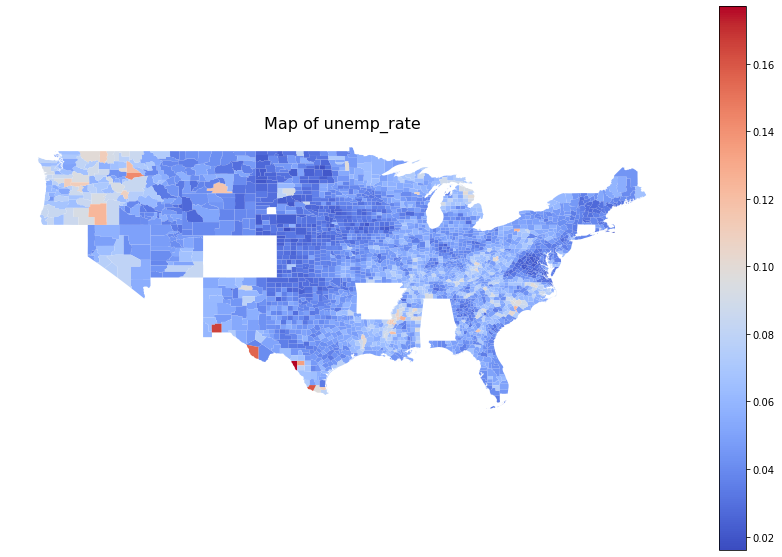

In [37]:
import matplotlib.pyplot as plt

# Column to visualize
column_to_map = 'unemp_rate'

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
contiguous_gdf.plot(column=column_to_map, cmap='coolwarm', legend=True, ax=ax)

# Add title and remove axes
ax.set_title(f"Map of {column_to_map}", fontsize=16)
ax.axis('off')

plt.show()


Let's plot the Alameda County. We can specify the [color](https://matplotlib.org/stable/gallery/color/named_colors.html) of the shape. 

<Axes: >

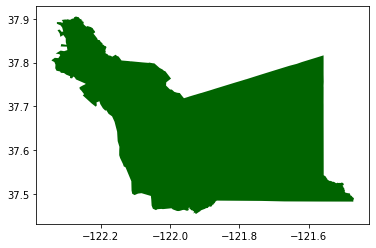

In [10]:
alameda_county.plot(color='darkgreen')

<a id='section2'></a>

# 2. 🎬 **Demo**:  Interactive Visualization

In addition to the static maps, we can visualize the spaital data on an interactive map. Here we use the `folium` library with `.geojson` layers for demonstration. 

In [27]:
! pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import folium

m = folium.Map(
        location = [37.6017, -121.7195], # we get the [lat, lon] of Alameda County [37.6017, -121.7195]
        tiles = "CartoDB positron",
        zoom_start = 10
        )

folium.GeoJson('../data/alameda_county.geojson', name = "county").add_to(m)
folium.GeoJson('../data/alameda_school.geojson', name = "school").add_to(m)
folium.GeoJson('../data/alameda_bike.geojson', name = "bike facility").add_to(m)

folium.LayerControl().add_to(m)

m

💡 **Tip**: In addition to the basic map, you can create all kinds of interactive maps. Check out the [documentation](https://python-visualization.github.io/folium/latest/). 

<a id='section4'></a>

# 4. 🥊 Challenge: Create Your Own Map

Now it's the time for you to generate some custom maps for the topics of your interest using the data and tools introduced in this workshop. 

In [ ]:
# YOUR CODE HERE


<div class="alert alert-success">

## ❗ Key Points

* 

</div>